In [2]:
import random
import numpy as np
import  matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
def y_func(x):
    t = 3*x[:,0]  - 2 * x[:,1] + 5   + x[:,0]**2
    t[t<=50] = 0
    t[t>50] = 1
    return t

In [4]:
# para
train_data_number = 500
train_x_mean = [0,0]
test_x_mean = [20,40]

train_x_var = [10,10]
test_x_var = [10,30]



In [5]:
# train data
x = np.zeros((train_data_number,2))
train_x_pdf_on_train_dist = np.zeros((train_data_number))
train_x_pdf_on_test_dist = np.zeros((train_data_number))
for i in range(train_data_number):
    a=np.random.normal(loc=train_x_mean[0], scale=train_x_var[0], size=None)
    x[i,0] = a
    
    pdf = norm.pdf(a, train_x_mean[0], train_x_var[0])
    train_x_pdf_on_train_dist[i] = pdf
    
    pdf = norm.pdf(a, test_x_mean[0], test_x_var[0])
    train_x_pdf_on_test_dist[i] = pdf
    
    
for i in range(train_data_number):
    a=np.random.normal(loc=train_x_mean[1], scale=train_x_var[1], size=None)
    x[i,1] = a
    
    pdf = norm.pdf(a, train_x_mean[1], train_x_var[1])
    train_x_pdf_on_train_dist[i] = pdf*train_x_pdf_on_train_dist[i]

    pdf = norm.pdf(a, test_x_mean[1], test_x_var[1])
    train_x_pdf_on_test_dist[i] = pdf*train_x_pdf_on_test_dist[i]

train_x_weight = train_x_pdf_on_train_dist/train_x_pdf_on_test_dist
# plt.scatter(x[:,0],x[:,1])

In [6]:
# test data
x_test = np.zeros((500,2))

test_x_pdf_on_train_dist = np.zeros((500))
test_x_pdf_on_test_dist = np.zeros((500))

for i in range(500):
    a=np.random.normal(loc=test_x_mean[0], scale=test_x_var[0], size=None)
    x_test[i,0] = a
    
    pdf = norm.pdf(a, train_x_mean[0], train_x_var[0])
    test_x_pdf_on_train_dist[i] = pdf
    
    pdf = norm.pdf(a, test_x_mean[0], test_x_var[0])
    test_x_pdf_on_test_dist[i] = pdf
    
    
for i in range(500):
    a=np.random.normal(loc=test_x_mean[1], scale=test_x_var[1], size=None)
    x_test[i,1] = a
    
    pdf = norm.pdf(a, train_x_mean[1], train_x_var[1])
    test_x_pdf_on_train_dist[i] = pdf*test_x_pdf_on_train_dist[i]
    
    pdf = norm.pdf(a, test_x_mean[1], test_x_var[1])
    test_x_pdf_on_test_dist[i] = pdf*test_x_pdf_on_test_dist[i]

test_x_weight = test_x_pdf_on_train_dist/test_x_pdf_on_test_dist
# plt.scatter(x_test[:,0],x_test[:,1])

In [7]:
def create_training_testing_data():
    # train data
    x = np.zeros((train_data_number,2))
    train_x_pdf_on_train_dist = np.zeros((train_data_number))
    train_x_pdf_on_test_dist = np.zeros((train_data_number))
    for i in range(train_data_number):
        a=np.random.normal(loc=train_x_mean[0], scale=train_x_var[0], size=None)
        x[i,0] = a

        pdf = norm.pdf(a, train_x_mean[0], train_x_var[0])
        train_x_pdf_on_train_dist[i] = pdf

        pdf = norm.pdf(a, test_x_mean[0], test_x_var[0])
        train_x_pdf_on_test_dist[i] = pdf


    for i in range(train_data_number):
        a=np.random.normal(loc=train_x_mean[1], scale=train_x_var[1], size=None)
        x[i,1] = a

        pdf = norm.pdf(a, train_x_mean[1], train_x_var[1])
        train_x_pdf_on_train_dist[i] = pdf*train_x_pdf_on_train_dist[i]

        pdf = norm.pdf(a, test_x_mean[1], test_x_var[1])
        train_x_pdf_on_test_dist[i] = pdf*train_x_pdf_on_test_dist[i]

    train_x_weight = train_x_pdf_on_train_dist/train_x_pdf_on_test_dist
    # plt.scatter(x[:,0],x[:,1])
    
    # test data
    x_test = np.zeros((500,2))

    test_x_pdf_on_train_dist = np.zeros((500))
    test_x_pdf_on_test_dist = np.zeros((500))

    for i in range(500):
        a=np.random.normal(loc=test_x_mean[0], scale=test_x_var[0], size=None)
        x_test[i,0] = a

        pdf = norm.pdf(a, train_x_mean[0], train_x_var[0])
        test_x_pdf_on_train_dist[i] = pdf

        pdf = norm.pdf(a, test_x_mean[0], test_x_var[0])
        test_x_pdf_on_test_dist[i] = pdf


    for i in range(500):
        a=np.random.normal(loc=test_x_mean[1], scale=test_x_var[1], size=None)
        x_test[i,1] = a

        pdf = norm.pdf(a, train_x_mean[1], train_x_var[1])
        test_x_pdf_on_train_dist[i] = pdf*test_x_pdf_on_train_dist[i]

        pdf = norm.pdf(a, test_x_mean[1], test_x_var[1])
        test_x_pdf_on_test_dist[i] = pdf*test_x_pdf_on_test_dist[i]

    test_x_weight = test_x_pdf_on_train_dist/test_x_pdf_on_test_dist
    # plt.scatter(x_test[:,0],x_test[:,1])
    
    return x,x_text, train_x_weight ,test_x_weight

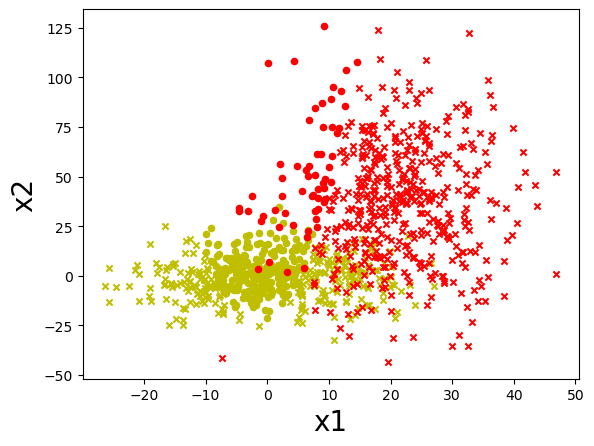

In [11]:
plt.scatter(x[y_func(x)==0,0],x[y_func(x)==0,1],c = 'y',marker = 'o',s = 20)
plt.scatter(x[y_func(x)==1,0],x[y_func(x)==1,1],c = 'y',marker = 'x',s = 20)


plt.scatter(x_test[y_func(x_test)==0,0],x_test[y_func(x_test)==0,1],c = 'r',marker = 'o',s = 20)
plt.scatter(x_test[y_func(x_test)==1,0],x_test[y_func(x_test)==1,1],c = 'r',marker = 'x',s = 20)
# plt.yticks(np.arange(-100, 100, 1000))
# plt.xticks(np.arange(-100, 100, 1000))
plt.xlabel('x1',fontsize = 20)
plt.ylabel('x2',fontsize = 20)
plt.savefig('covariate_data.png')

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y_func(x))

y_test = y_func(x_test)
predy = reg.predict(x_test)

print(np.mean((predy-y_test)**2))

0.544256935800392


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.stats import norm,multivariate_normal

import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# from random import shuffle
from sklearn.utils import shuffle

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import argparse
from sklearn.utils import shuffle
from ope_v3 import *


class WEIGHT_DATA_SET(data.Dataset):
    '''
    dataset class with instance weight
    '''

    def __init__(self, data, reward, weights):
        '''
        weights are same dimensional witi original data
        '''
        self.data = torch.tensor(data)
        self.reward = torch.tensor(reward)
        self.weights = torch.tensor(weights)

    def __getitem__(self, index):
        img = self.data[index]
        target = self.reward[index]
        weight = self.weights[index]
        return img, target, weight

    def __len__(self):
        return len(self.data)


def train_robust_regression(x, y, weight, lr1, lr2,mylambda):
    weight_st = my_bound(weight)
    weighted_train = WEIGHT_DATA_SET(x, y, weight)

    train_model = Net(2, 2, 1)

    validate_size = int(0.1 * 500)
    validate_loader = data.DataLoader(data.Subset(weighted_train, range(0, validate_size)),
                                      batch_size=64, shuffle=True)
    # 10% validation set
    train_loader = data.DataLoader(data.Subset(weighted_train, range(validate_size, 450)),
                                   batch_size=64, shuffle=True, )

    train_model, Myy, Myx, _, _, _ = train_validate_test(args, args.lr_robust, 400, "regression", 'cpu', 'False',
                                                         train_model,
                                                         train_loader, None, validate_loader, 1, 0.000,
                                                         d=2, testflag=False, lr1=lr1, lr2=lr2, mylambda = mylambda,if_01 = False)

    return train_model, Myy, Myx


def predict_regression(x,  weight, Myy, Myx, model,if_01 = False):

    weight_st = my_bound(weight)

    output = model(torch.tensor(x))

    meanY, varY = ru.predict_regression(torch.tensor(weight_st), Myy, Myx, output, mean0, var0,if_01 = False)
    return meanY.detach().numpy()

mylambda = torch.tensor([0,0.1,0.3,0]).reshape((4,1))
# mylambda = torch.tensor([0,0,0.0,0]).reshape((4,1))

for lr in [2,1,0.5,0.1]:
    
    model, Myy, Myx = train_robust_regression(x, y_func(x),train_x_weight , lr, lr,mylambda=mylambda)

    y_test = y_func(x_test)
    prediction = []
    # for i in range(len(x_test)):
    predy = predict_regression(x_test, test_x_weight, Myy, Myx, model,if_01 = False)

    # prediction = np.array(prediction)
    # print(np.mean((prediction-y_test)**2))
    print(np.mean((predy-y_test)**2))

0.18251691368132175
0.1835940315475625
0.18624029320816296
0.19036045211280217


In [17]:
params = []
mse_result = []

for lr in [2,1,0.5,0.1]:
    for lambdax1 in [0.1]:
        for lambdax2 in [0.5]:
            mylambda = torch.tensor([0,lambdax1,lambdax2,0]).reshape((4,1))
            mse = []
            for k in range(10):
                
                model, Myy, Myx = train_robust_regression(x, y_func(x),train_x_weight , lr, lr,mylambda=mylambda)

                y_test = y_func(x_test)

                predy = predict_regression(x_test, test_x_weight, Myy, Myx, model,False)
                a = np.mean((predy-y_test)**2)
                mse.append(a)
            para = str(lr) + '_' + str(lambdax1)+ '_' + str(lambdax2)
            params.append(para)
            mse_result.append(np.mean(mse))
            print(lr,lambdax1,lambdax2,np.mean(mse),np.var(mse))

2 0.1 0.5 0.18145313041164474 5.6627853566176885e-05
1 0.1 0.5 0.1844295056313821 1.4555171052356726e-05
0.5 0.1 0.5 0.18339220963308617 1.6067802631545995e-05
0.1 0.1 0.5 0.18794181721295594 1.3694200854096298e-05


In [ ]:
index = np.argmin(mse_result)
print(index)
print(params[index])
print(mse_result[index])

In [ ]:
# 2 0 0.02 0.15295670262351985


In [15]:
# no slack

mse_no_slack=[]
params_no_slack = []
for i in range(len(params)):
    p = params[i]
    t = p.split('_')
    if t[1] == '0' and t[2] == '0':
        mse_no_slack.append(mse_result[i])
        params_no_slack.append(params[i])
    


NameError: name 'params' is not defined

In [11]:
index = np.argmin(mse_no_slack)
print(index)
print(params_no_slack[index])
print(mse_no_slack[index])

ValueError: attempt to get argmin of an empty sequence